In [74]:
import math
import csv
import operator
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

In [75]:
#导入数据
train_data=pd.read_csv('./data/train.csv',header = 0)#训练集
val_data=pd.read_csv('./data/val.csv')#验证集
test_data=pd.read_csv('./data/test_data.csv')#测试集 

#测试并导入数据及长度，以便后续使用
Length_train_data=train_data.shape[0]
Length_test_data=test_data.shape[0]
Length_val_data=val_data.shape[0]

#储存训练集中的label
train_data_label= train_data.iloc[:,-1]

In [76]:
#计算欧式距离
def EuclideanDistance(val_data,train_data,val_dot,train_dot):
    ED=0
    SL_D=(val_data['Sepal Length'][val_dot]-train_data['Sepal Length'][train_dot])**2
    SW_D=(val_data['Sepal Width'][val_dot]-train_data['Sepal Width'][train_dot])**2
    PL_D=(val_data['Petal Length'][val_dot]-train_data['Petal Length'][train_dot])**2
    PW_D=(val_data['Petal Width'][val_dot]-train_data['Petal Width'][train_dot])**2
    ED=SL_D+SW_D+PL_D+PW_D
    return ED**0.5

#计算切比雪夫距离
def ChebyshevDistance(val_data,train_data,val_dot,train_dot):
    CD=0
    SL_D=abs(val_data['Sepal Length'][val_dot]-train_data['Sepal Length'][train_dot])
    SW_D=abs(val_data['Sepal Width'][val_dot]-train_data['Sepal Width'][train_dot])
    PL_D=abs(val_data['Petal Length'][val_dot]-train_data['Petal Length'][train_dot])
    PW_D=abs(val_data['Petal Width'][val_dot]-train_data['Petal Width'][train_dot])
    CD=max(SL_D,SW_D,PL_D,PW_D)
    return CD

#计算曼哈顿距离
def ManhattanDistance(val_data,train_data,val_dot,train_dot):
    MD=0
    SL_D=abs(val_data['Sepal Length'][val_dot]-train_data['Sepal Length'][train_dot])
    SW_D=abs(val_data['Sepal Width'][val_dot]-train_data['Sepal Width'][train_dot])
    PL_D=abs(val_data['Petal Length'][val_dot]-train_data['Petal Length'][train_dot])
    PW_D=abs(val_data['Petal Width'][val_dot]-train_data['Petal Width'][train_dot])
    MD=SL_D+SW_D+PL_D+PW_D
    return MD

In [77]:
#预测分类类别label{0,1,2}

def predict(k,distance,train_data_label):
    #将距离和对应的训练数据标签组成一个字典，使用zip函数将两个列表进行合并
    #并使用dict函数将合并后的结果转换为字典，得到了一个以距离为键，训练数据标签为值的字典
    dict_of_distance=dict(zip(distance,train_data_label))
    
    #按照距离从小到大的顺序进行排列，排序的依据是字典项的键
    order=sorted(dict_of_distance.items(),key=lambda x:x[0])
    
    #逆序排列前k个的距离
    temp=[]
    for i in range(k):
        temp.append(order[i][1])
        
    vote=[0,0,0]#不同标签的数目
    for i in range(k):
        vote[temp[i]]+=1
        
    result=vote.index(max(vote))#选择数目较多的类别作为最终类别
    return result

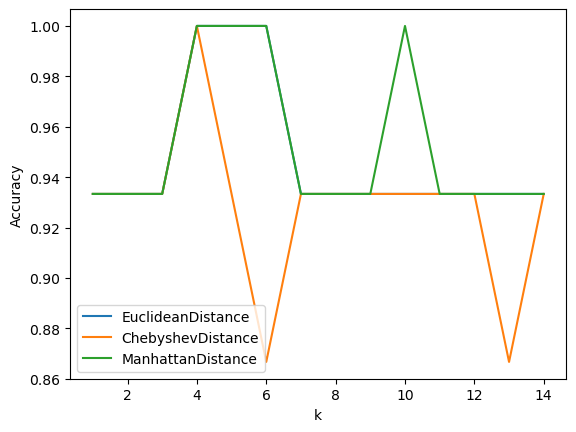

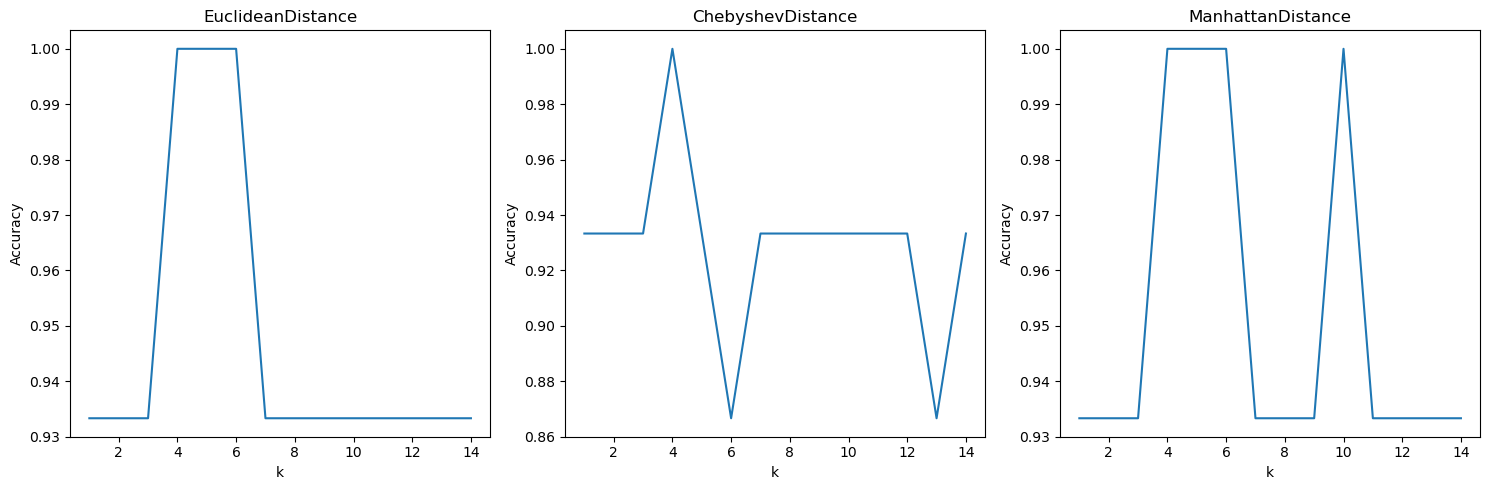

In [78]:
#绘制分类的准确率随k值变化的折线图，并选取准确率最高的k用作后续实验

train_data_len = train_data.shape[0]
val_data_len = val_data.shape[0]

#记录准确率
result_e=[]#欧式距离
result_c=[]#切比雪夫距离
result_m=[]#曼哈顿距离

#遍历k最大值
k_max=15
for k in range(1,k_max):
    
    #分类正确的数目
    counter_correct_e=0#欧式
    counter_correct_c=0#切比雪夫
    counter_correct_m=0#曼哈顿
    
    for j in range(val_data_len):#在验证集中验证
        label=val_data['label'][j]
        
        #训练集中所有点到验证集第j个点的距离
        distance_e=[]#欧式
        distance_c=[]#切比雪夫
        distance_m=[]#曼哈顿
        
        for i in range(train_data_len):     
            
            #计算距离
            distance_e.append(EuclideanDistance(val_data,train_data,j,i))#欧氏
            distance_c.append(ChebyshevDistance(val_data,train_data,j,i))#切比雪夫
            distance_m.append(ManhattanDistance(val_data,train_data,j,i))#曼哈顿
            
        #预测类别
        result_e_=predict(k,distance_e,train_data_label)    
        result_c_=predict(k,distance_c,train_data_label)   
        result_m_=predict(k,distance_m,train_data_label)   
        
        if label==result_e_:
            counter_correct_e+=1
        if label==result_c_:
            counter_correct_c+=1
        if label==result_m_:
            counter_correct_m+=1
            
    #计算k的正确率    
    result_e.append(counter_correct_e/val_data_len)
    result_c.append(counter_correct_c/val_data_len)
    result_m.append(counter_correct_m/val_data_len)
    
plt.plot(list(range(1, k_max)), result_e, label='EuclideanDistance')
plt.plot(list(range(1, k_max)), result_c, label='ChebyshevDistance')
plt.plot(list(range(1, k_max)), result_m, label='ManhattanDistance')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()
plt.show()#绘制不同的k对应的正确率
fig, axs = plt.subplots(1, 3, figsize=(15, 5))  # 创建具有三个子图的图像

# 在每个子图中绘制折线图
axs[0].plot(list(range(1, k_max)), result_e)
axs[0].set_xlabel('k')
axs[0].set_ylabel('Accuracy')
axs[0].set_title('EuclideanDistance')

axs[1].plot(list(range(1, k_max)), result_c)
axs[1].set_xlabel('k')
axs[1].set_ylabel('Accuracy')
axs[1].set_title('ChebyshevDistance')

axs[2].plot(list(range(1, k_max)), result_m)
axs[2].set_xlabel('k')
axs[2].set_ylabel('Accuracy')
axs[2].set_title('ManhattanDistance')

plt.tight_layout()  # 调整子图布局
plt.show()

In [79]:
#经分析得最佳的k可以取5
k=5

#记录正确分类个数
counter_e=0
counter_c=0
counter_m=0

for j in range(val_data.shape[0]):#在验证集中验证
    label=val_data['label'][j]
    
    #保存距离
    distance_e=[]
    distance_c=[]
    distance_m=[]     
    for i in range(0,train_data.shape[0]):
        
        #计算距离
        distance_e.append(EuclideanDistance(val_data,train_data,j,i))#欧氏距离
        distance_c.append(ChebyshevDistance(val_data,train_data,j,i))#切比雪夫距离
        distance_m.append(ManhattanDistance(val_data,train_data,j,i))#曼哈顿距离
    
    #预测类别
    result_e=predict(k,distance_e,train_data_label)  
    result_c=predict(k,distance_c,train_data_label)
    result_m=predict(k,distance_m,train_data_label)
    if label==result_e:
        counter_e+=1
    if label==result_c:
        counter_c+=1
    if label==result_m:
        counter_m+=1
print("the predicsion for euclidean distance is:")
print(counter_e/val_data.shape[0])
print("the predicsion for chebyshev distance is:")
print(counter_c/val_data.shape[0])
print("the predicsion for manhattan distance is:")
print(counter_m/val_data.shape[0])

the predicsion for euclidean distance is:
1.0
the predicsion for chebyshev distance is:
0.9333333333333333
the predicsion for manhattan distance is:
1.0


In [81]:
#经分析得最佳的k可以取5
k=5

#利用欧氏距离为距离度量得到预测结果
result_test1=[]
for j in range(0,Length_test_data):#测试集共计38条数据
    distance_test=[]
    for i in range(Length_train_data):#求解距离训练集中其他点的距离           
        distance_test.append(EuclideanDistance(test_data,train_data,j,i))
    a=predict(k,distance_test,train_data_label)
    result_test1.append(a)      
test_euclidean=pd.DataFrame(result_test1, columns=['label'])
print("euclidean done")
test_euclidean.to_csv('mypredicsion_csv/task1_test_prediction.csv',index=0)

#用于可视化
test_euclidean_for_visual=pd.DataFrame(np.column_stack((test_data,result_test1)),columns
    =['Sepal Length','Sepal Width','Petal Length','Petal Width','My prediction'])

test_euclidean_for_visual.to_csv('mypredicsion_csv/for visual/task1_test_Euclidean1.csv',index=0)
    
#利用切比雪夫距离作为距离度量
result_test2=[]
for j in range(0,Length_test_data):#测试集共计38条数据
    distance_test=[]
    for i in range(Length_train_data):#求解距离训练集中其他点的距离           
        distance_test.append(ChebyshevDistance(test_data,train_data,j,i))
    a=predict(k,distance_test,train_data_label)
    result_test2.append(a)
test_chebyshev=pd.DataFrame(result_test2, columns=['label'])
print("chebyshev done")
test_chebyshev.to_csv('mypredicsion_csv/task1_test_Chebyshev(扩展).csv',index=0)

#用于可视化
test_chebyshev_for_visual=pd.DataFrame(np.column_stack((test_data,result_test2)),columns
    =['Sepal Length','Sepal Width','Petal Length','Petal Width','My prediction'])

test_chebyshev_for_visual.to_csv('mypredicsion_csv/for visual/task1_test_Chebyshev(扩展).csv',index=0)

#利用曼哈顿距离作为距离度量
result_test3=[]
for j in range(0,Length_test_data):#测试集共计38条数据
    distance_test=[]
    for i in range(Length_train_data):#求解距离训练集中其他点的距离           
        distance_test.append(ManhattanDistance(test_data,train_data,j,i))
    a=predict(k,distance_test,train_data_label)
    result_test3.append(a)      
test_manhattan=pd.DataFrame(result_test3, columns=['label'])
print("manhattan done")
test_manhattan.to_csv('mypredicsion_csv/task1_test_Manhattan(扩展).csv',index=0)

#用于可视化
test_manhattan_for_visual=pd.DataFrame(np.column_stack((test_data,result_test1)),columns
    =['Sepal Length','Sepal Width','Petal Length','Petal Width','My prediction'])

test_manhattan_for_visual.to_csv('mypredicsion_csv/for visual/task1_test_Manhattan(扩展).csv', index=0)


euclidean done
chebyshev done
manhattan done
